# Aprendizaje Supervisado


Los métodos de aprendizaje supervisado incluyen algoritmos que toman muestras de datos (datos de entrenamiento) y salidas asociadas (etiquetas o respuestas) durante el proceso de entrenamiento el modelo. El objeto principal es aprender un mapeo o asociación entre las muestras de datos de entrada $x$ y sus correspondientes salidas $y$, basándose en múltiples instancias de datos de entrenamiento. Este conocimiento aprendido se puede utilizar en el futuro para predecir una salida $y'$ para cualquier nueva muestra de datos de entrada $x'$ que antes se desconocía o no se veía durante el proceso de entrenamiento del modelo.

El aprendizaje supervisado a menudo requieren un esfuerzo humano para construir el conjunto de capacitación, pero luego lo automatiza y, a menudo, acelera una tarea que de otro modo sería laboriosa o inviable.

Los método de aprendizaje supervisado son de dos clase, según el tipo de tareas de aprendizaje automático que pretender resolver:

- ***Clasificación***: Predecir una etiqueta de clase, que es una elección de una lista predefinida de posibilidades.
- ***Regresión***: Predecir un número real continuo.

Si se quiere hallar un valor continuo, entonces el problema es de regresión, de lo contrario se habla de clasificación.

**Generalización**: Ocurre cuando el modelo es capaz de hacer predicciones precisas sobre los datos.


## Regresión Lineal


Es una técnica que se utiliza para poder predecir variables continuas dependientes, a partir de un conjunto de variables independientes. Es de carácter paramétrico, debido a que las suposiciones se realizan a partir de un conjunto de datos provistos.

En terminos matemáticos, se utiliza la ecuación de la recta para aproximar los datos:

$$y = ax + b$$

Con la regresión lineal se busca minimizar la distancia vertical entre los datos y la línea. Uno de los métodos más usados es el conocido como Mínimos Cuadrados, donde se busca reducir el error entre la línea resultante y los puntos de los datos.

### Pasos de preparación

1. Se debe establecer un problema que:
   - Se conozca el contexto
   - Se busque predecir algún dato o evento
2. Se requieren datos sobre el problema que:
   - Den resolución anterior al problema que se está resolviendo
   - Contenga una buena cantidad de datos.
   - Sean fácil de conseguir.
   - Estén en formato de tabla (Excel o CSV).
3. Se debe contar con un software para programar el modelo.


## Ejemplo Práctico

¿Cuánto tiempo gastará un corredor en correr una maratón?

1. Se busca o extrae un conjunto de datos acerca del problema.
   > Para este ejemplo se descargaron los datos de [Marathon Time Predictions](https://www.kaggle.com/girardi69/marathon-time-predictions/version/2)


In [1]:
import numpy as np
import pandas as pd


2. Preparar y/o cargar los datos.

In [2]:
marathon_data = pd.read_csv("Datasets/MarathonData.csv")
marathon_data

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,NaN,1.16,2.37,A
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,NaN,1.23,2.59,A
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,NaN,1.30,2.66,A
3,4,Prague17,Daniel Or lek,M45,137.5,12.258544,NaN,1.32,2.68,A
4,5,Prague17,Luk ? Mr zek,MAM,84.6,13.945055,NaN,1.36,2.74,A
...,...,...,...,...,...,...,...,...,...,...
82,83,Prague17,Stefano Vegliani,M55,50.0,10.830325,NaN,2.02,3.93,D
83,84,Prague17,Andrej Madliak,M40,33.6,10.130653,ciclista 3h,1.94,3.93,D
84,85,Prague17,Yoi Ohsako,M40,55.4,11.043189,NaN,1.94,3.94,D
85,86,Prague17,Simon Dunn,M45,33.2,11.066667,NaN,2.05,3.95,D


In [3]:
marathon_data['MarathonTime']

0     2.37
1     2.59
2     2.66
3     2.68
4     2.74
      ... 
82    3.93
83    3.93
84    3.94
85    3.95
86    3.98
Name: MarathonTime, Length: 87, dtype: float64

In [4]:
marathon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             87 non-null     int64  
 1   Marathon       87 non-null     object 
 2   Name           87 non-null     object 
 3   Category       81 non-null     object 
 4   km4week        87 non-null     float64
 5   sp4week        87 non-null     float64
 6   CrossTraining  13 non-null     object 
 7   Wall21         87 non-null     object 
 8   MarathonTime   87 non-null     float64
 9   CATEGORY       87 non-null     object 
dtypes: float64(3), int64(1), object(6)
memory usage: 6.9+ KB


In [5]:
marathon_data.isnull().sum()

id                0
Marathon          0
Name              0
Category          6
km4week           0
sp4week           0
CrossTraining    74
Wall21            0
MarathonTime      0
CATEGORY          0
dtype: int64

La columna `Wall21` es de tipo objeto, pero para nuestra conveniencia, preferimos que sea tipo númerico.

In [6]:
marathon_data['Wall21'] = pd.to_numeric(marathon_data['Wall21'], errors='coerce')

In [7]:
marathon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             87 non-null     int64  
 1   Marathon       87 non-null     object 
 2   Name           87 non-null     object 
 3   Category       81 non-null     object 
 4   km4week        87 non-null     float64
 5   sp4week        87 non-null     float64
 6   CrossTraining  13 non-null     object 
 7   Wall21         81 non-null     float64
 8   MarathonTime   87 non-null     float64
 9   CATEGORY       87 non-null     object 
dtypes: float64(4), int64(1), object(5)
memory usage: 6.9+ KB


In [8]:
marathon_data.describe()

,id,km4week,sp4week,Wall21,MarathonTime
count,87.000000,87.000000,87.000000,81.000000,87.000000
mean,44.000000,62.347126,139.840706,1.630617,3.319080
std,25.258662,26.956019,1191.427864,0.210490,0.376923
min,1.000000,17.900000,8.031414,1.160000,2.370000
25%,22.500000,44.200000,11.498168,1.450000,3.045000
50%,44.000000,58.800000,12.163424,1.620000,3.320000
75%,65.500000,77.500000,12.854036,1.760000,3.605000
max,87.000000,137.500000,11125.000000,2.050000,3.980000


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'km4week'}>],
       [<AxesSubplot:title={'center':'sp4week'}>,
        <AxesSubplot:title={'center':'Wall21'}>],
       [<AxesSubplot:title={'center':'MarathonTime'}>, <AxesSubplot:>]],
      dtype=object)

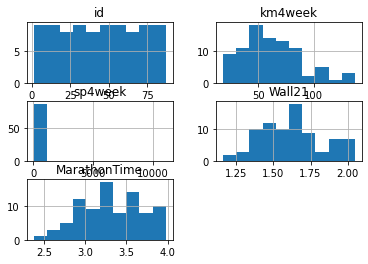

In [9]:
marathon_data.hist()

3. Escoger los datos más relevantes del conjunto de datos. Se seleccionan los datos o columnas más relevantes para el objetivo de la predicción, en este caso seria la columna de `MarathonTime`, `km4week`, `sp4week`, `Wall21`, `Category`, `CATEGORY`. Se puede eliminar esas columnas de la varible que almacena nuestra data, o creando un nuevo conjunto de datos descartando los datos no deseados.

In [10]:
marathon_data_clear = marathon_data.drop(columns=['Name', 'id', 'Marathon'])

In [11]:
marathon_data_clear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Category       81 non-null     object 
 1   km4week        87 non-null     float64
 2   sp4week        87 non-null     float64
 3   CrossTraining  13 non-null     object 
 4   Wall21         81 non-null     float64
 5   MarathonTime   87 non-null     float64
 6   CATEGORY       87 non-null     object 
dtypes: float64(4), object(3)
memory usage: 4.9+ KB


4. Verificar si hay datos nulos y tomar una acción al respecto (rellenar los faltantes o eliminarlos del registro).

In [12]:
marathon_data_clear.isnull().sum()

Category          6
km4week           0
sp4week           0
CrossTraining    74
Wall21            6
MarathonTime      0
CATEGORY          0
dtype: int64

In [13]:
marathon_data_clear.isna().sum()

Category          6
km4week           0
sp4week           0
CrossTraining    74
Wall21            6
MarathonTime      0
CATEGORY          0
dtype: int64

<AxesSubplot:>

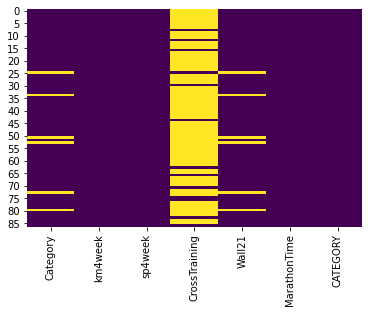

In [14]:
import seaborn as sns

sns.heatmap(marathon_data_clear.isnull(), cbar=False, cmap='viridis')

En la columna de `CrossTraining`, decidimos llenar con 0 con el fin de tener en cuenta a quienes hicieron entreamiento cruzado.

In [15]:
marathon_data_clear['CrossTraining'] = marathon_data_clear['CrossTraining'].fillna(0)

In [16]:
marathon_data_clear.isna().sum()

Category         6
km4week          0
sp4week          0
CrossTraining    0
Wall21           6
MarathonTime     0
CATEGORY         0
dtype: int64

Otra decisión es eliminar todos los campos que tenga datos nulos, luego de llenar con 0 los registros de `CrossTraining`

In [17]:
marathon_data_clear = marathon_data_clear.dropna(how='any')

In [18]:
marathon_data_clear.isna().sum()

Category         0
km4week          0
sp4week          0
CrossTraining    0
Wall21           0
MarathonTime     0
CATEGORY         0
dtype: int64

In [19]:
marathon_data_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 0 to 86
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Category       81 non-null     object 
 1   km4week        81 non-null     float64
 2   sp4week        81 non-null     float64
 3   CrossTraining  81 non-null     object 
 4   Wall21         81 non-null     float64
 5   MarathonTime   81 non-null     float64
 6   CATEGORY       81 non-null     object 
dtypes: float64(4), object(3)
memory usage: 5.1+ KB


5. El modelo requiere que los datos incluidos sean de tipo número, por tanto, aquellos que no lo sean, deben tener una transformación.
   1. Verificar cuántos valores diferentes tenemos.
   2. Asignar un valor numérico o valor.

In [20]:
marathon_data_clear['CrossTraining'].unique()

array([0, 'ciclista 1h', 'ciclista 4h', 'ciclista 13h', 'ciclista 3h',
       'ciclista 5h'], dtype=object)

In [21]:
val_cross = {
    'CrossTraining': {
        0: 0,
        'ciclista 1h': 1,
        'ciclista 3h': 3,
        'ciclista 4h': 4,
        'ciclista 5h': 5,
        'ciclista 13h': 13
    }
}
marathon_data_clear.replace(val_cross, inplace=True)


In [22]:
marathon_data_clear

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY
0,MAM,132.8,14.434783,0,1.16,2.37,A
1,MAM,68.6,13.674419,0,1.23,2.59,A
2,MAM,82.7,13.520436,0,1.30,2.66,A
3,M45,137.5,12.258544,0,1.32,2.68,A
4,MAM,84.6,13.945055,0,1.36,2.74,A
...,...,...,...,...,...,...,...
82,M55,50.0,10.830325,0,2.02,3.93,D
83,M40,33.6,10.130653,3,1.94,3.93,D
84,M40,55.4,11.043189,0,1.94,3.94,D
85,M45,33.2,11.066667,0,2.05,3.95,D


In [23]:
marathon_data_clear['Category'].unique()

array(['MAM', 'M45', 'M40', 'M50', 'M55', 'WAM'], dtype=object)

In [24]:
val_category = {
    'Category': {
        'MAM': 1,
        'M45': 2,
        'M40': 3,
        'M50': 4,
        'M55': 5,
        'WAM': 6
    }
}

marathon_data_clear.replace(val_category, inplace=True)

In [25]:
marathon_data_clear

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY
0,1,132.8,14.434783,0,1.16,2.37,A
1,1,68.6,13.674419,0,1.23,2.59,A
2,1,82.7,13.520436,0,1.30,2.66,A
3,2,137.5,12.258544,0,1.32,2.68,A
4,1,84.6,13.945055,0,1.36,2.74,A
...,...,...,...,...,...,...,...
82,5,50.0,10.830325,0,2.02,3.93,D
83,3,33.6,10.130653,3,1.94,3.93,D
84,3,55.4,11.043189,0,1.94,3.94,D
85,2,33.2,11.066667,0,2.05,3.95,D


In [26]:
marathon_data_clear['CATEGORY'].unique()

array(['A', 'B', 'C', 'D'], dtype=object)

In [27]:
val_CATEGORY = {
    'CATEGORY': {
        'A': 1,
        'B': 2,
        'C': 3,
        'D': 4
    }
}

marathon_data_clear.replace(val_CATEGORY, inplace=True)

In [28]:
marathon_data_clear

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY
0,1,132.8,14.434783,0,1.16,2.37,1
1,1,68.6,13.674419,0,1.23,2.59,1
2,1,82.7,13.520436,0,1.30,2.66,1
3,2,137.5,12.258544,0,1.32,2.68,1
4,1,84.6,13.945055,0,1.36,2.74,1
...,...,...,...,...,...,...,...
82,5,50.0,10.830325,0,2.02,3.93,4
83,3,33.6,10.130653,3,1.94,3.93,4
84,3,55.4,11.043189,0,1.94,3.94,4
85,2,33.2,11.066667,0,2.05,3.95,4


6. Entrenamiento. Conocer la relación entre los datos.

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

Podemos observar los comportamientos de los datos de una columna frente a otra. Esta la manera de hacer uno por uno, o generar un gráfico grupal.

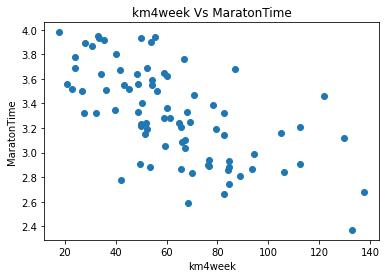

In [30]:
plt.scatter(x = marathon_data_clear['km4week'], y = marathon_data_clear['MarathonTime'])
plt.title('km4week Vs MaratonTime')
plt.xlabel('km4week')
plt.ylabel('MaratonTime')
plt.show()

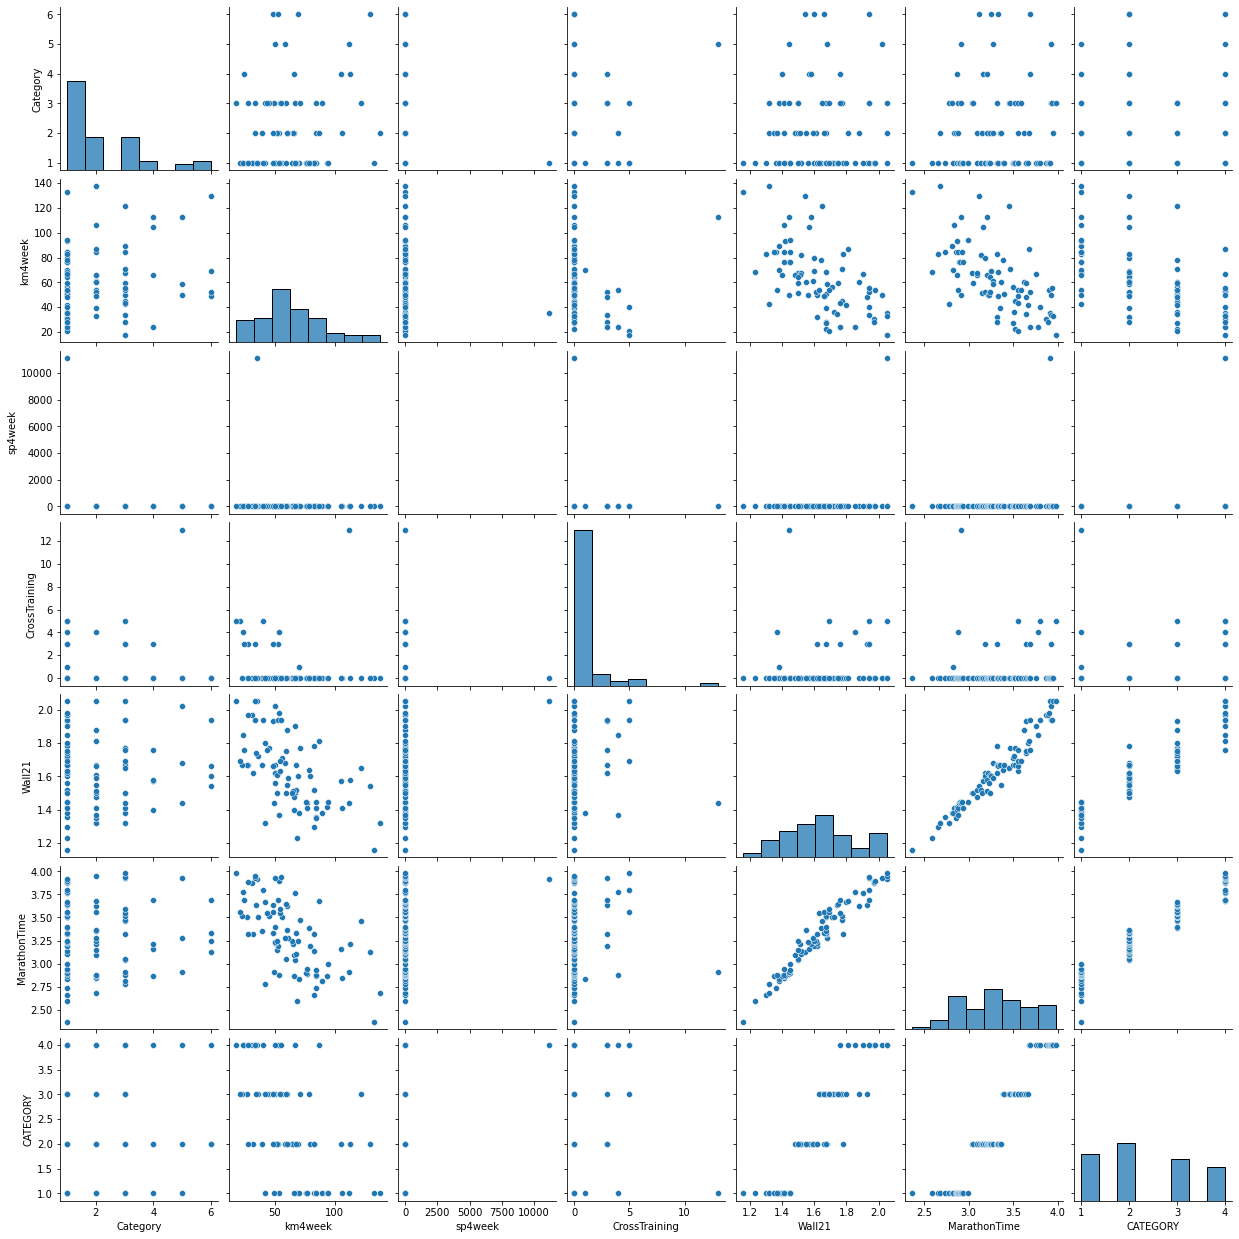

In [31]:
sns.pairplot(marathon_data_clear)

Hay datos que estan en los extremos, trayendo gráficas muy extrañas. En tal caso, podemos hacer una query para determinar un limite.

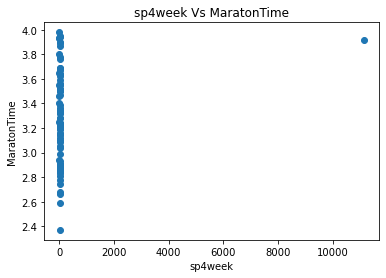

In [32]:
plt.scatter(x = marathon_data_clear['sp4week'], y = marathon_data_clear['MarathonTime'])
plt.title('sp4week Vs MaratonTime')
plt.xlabel('sp4week')
plt.ylabel('MaratonTime')
plt.show()

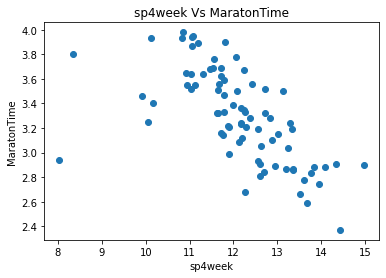

In [33]:
marathon_data_clear = marathon_data_clear.query('sp4week<2000')
plt.scatter(x = marathon_data_clear['sp4week'], y = marathon_data_clear['MarathonTime'])
plt.title('sp4week Vs MaratonTime')
plt.xlabel('sp4week')
plt.ylabel('MaratonTime')
plt.show()

7. Separar los datos para el entrenamiento.

In [34]:
train = marathon_data_clear.sample(frac=0.8, random_state=42)
test = marathon_data_clear.drop(train.index)

In [35]:
train

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY
31,1,79.4,13.344538,0,1.60,3.19,2
0,1,132.8,14.434783,0,1.16,2.37,1
22,3,59.4,12.638298,0,1.50,3.05,2
32,2,65.6,11.891239,0,1.51,3.21,2
18,1,84.5,12.549505,0,1.45,2.93,1
...,...,...,...,...,...,...,...
84,3,55.4,11.043189,0,1.94,3.94,4
61,1,54.1,11.116438,0,1.63,3.55,3
11,4,65.7,13.362712,0,1.40,2.87,1
33,4,112.4,12.284153,0,1.58,3.21,2


8. Separar la variable de predicción de las predictoras en cada subconjunto de datos.

In [36]:
tag_train = train.pop('MarathonTime')
tag_test = test.pop('MarathonTime')

In [37]:
tag_train, tag_test

(31    3.19
 0     2.37
 22    3.05
 32    3.21
 18    2.93
       ... 
 84    3.94
 61    3.55
 11    2.87
 33    3.21
 82    3.93
 Name: MarathonTime, Length: 64, dtype: float64,
 1     2.59
 2     2.66
 14    2.89
 20    2.99
 21    3.04
 23    3.09
 30    3.19
 39    3.25
 55    3.50
 56    3.50
 63    3.56
 64    3.59
 67    3.64
 74    3.76
 76    3.80
 79    3.90
 Name: MarathonTime, dtype: float64)

9. Ejecutar el entrenamiento

In [38]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train, tag_train)

LinearRegression()

10. Validación - Predecir

In [39]:
pred = lr.predict(test)

In [40]:
pred

array([2.72337806, 2.7683799 , 2.91243454, 2.91944387, 3.11164208,
       3.12266287, 3.26002736, 3.25929562, 3.47028283, 3.48681911,
       3.51510356, 3.47370513, 3.56120582, 3.79497651, 3.94138592,
       3.87817888])

11. Evaluar el error de las predicciones.

In [41]:
from sklearn.metrics import mean_squared_error

In [42]:
error = np.sqrt(mean_squared_error(tag_test, pred))
print('Error porcentual: %f' % (error*100) )

Error porcentual: 7.529199


12. Evaluar un nuevo registro.

In [43]:
new_runner = pd.DataFrame(np.array([[1, 400, 20, 0, 1.4, 1]]), columns=['Category', 'km4week', 'sp4week', 'CrossTraining', 'Wall21', "CATEGORY"])
new_runner

,Category,km4week,sp4week,CrossTraining,Wall21,CATEGORY
0,1.0,400.0,20.0,0.0,1.4,1.0


In [44]:
lr.predict(new_runner)

array([2.26593985])